#Thuật toán Tìm đa giác lồi song song

# Import thư viện cần thiết

In [19]:
import multiprocessing as mp
import matplotlib.pyplot as plt
from datetime import datetime # To measure running time of the algorithm
import os
import multiprocessing as mp
import sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
!pip install -U ray
import ray



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Đọc Input từ file CSV


In [2]:
def read(input_file):
    print("Reading: ", input_file)
    chunksize = 10 ** 8
    for chunk in pd.read_csv(input_file, chunksize=chunksize, header=None):
        input_points = chunk.values.tolist()
    print("Reading finished: ", input_file)
    return input_points

# Function biêu diễn trên hệ trục tọa độ

In [3]:
def show_graph(input_points, o_points):
    print("show graph: ")

    ############################################################
    # plot the orthogonal hull
    # adding points (angle 270)
    o_points.append(o_points[0])
    S = []
    n = len(o_points)
    # print("number points to plot: ", n)
    for i in range(0, n - 1):
        if o_points[i + 1][0] > o_points[i][0] and o_points[i + 1][1] > o_points[i][1]:

            p3 = [o_points[i][0], o_points[i + 1][1]]

            S.append([i + 1, p3])

        elif o_points[i + 1][0] > o_points[i][0] and o_points[i + 1][1] < o_points[i][1]:

            p3 = [o_points[i + 1][0], o_points[i][1]]

            S.append([i + 1, p3])

        elif o_points[i + 1][0] < o_points[i][0] and o_points[i + 1][1] < o_points[i][1]:

            p3 = [o_points[i][0], o_points[i + 1][1]]

            S.append([i + 1, p3])

        elif o_points[i + 1][0] < o_points[i][0] and o_points[i + 1][1] > o_points[i][1]:

            p3 = [o_points[i + 1][0], o_points[i][1]]

            S.append([i + 1, p3])
    # print("list index and points to be adding: ", S)
    for i in range(len(S)):
        o_points.insert(S[i][0] + i, S[i][1])
    o_points.append(o_points[0])
    ############################################################
    # Draw lines
    fig, ax = plt.subplots()
    # Input points in blue
    ax.plot([x[0] for x in input_points], [x[1] for x in input_points], 'r.')
    # Orthogonal convex hull points in red
    ax.plot([x[0] for x in o_points], [x[1] for x in o_points], 'b-')
    # ax.plot([list(points[0])[0], list(points[-1])[0]], [list(points[0])[1], list(points[-1])[1]],'r-')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()

# Thuật toán O quick hull tuần tự



In [4]:
'''
    p[0]: x- coordinate of P
    p[1]: y- coodinate of p
    def insnide(p, p1, p2): All points in the right of L(p1, p2)
    that is, all points that whose x-coordinate in (min(p1[0], p2[0]), max(p1[0], p2[0])) and y-codinate in min(p1[1], p2[1]), max(p1[1], p2[1])


def inside(p, p1, p2):
    if p == p1 or p == p2:
        return False
    return min(p1[0], p2[0]) <= p[0] <= max(p1[0], p2[0]) and \
           min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])
'''
#####################################################
'''
    finite extreme point.
'''

#####################################################
def find_o_hull1(set1, q1, qq1):
    if len(set1) == 0:
        #po = ortho(pf, pt, xInc, yInc) # SUPPORT POINTS
        return []
    
    def add(p):
        return (p[0] - q1[0])*(p[0] - q1[0]) + (p[1] - qq1[1])*(p[1] - qq1[1])
    
    sort_set1_Dist = sorted(set1, key = add, reverse=True) 
    new_point1 = sort_set1_Dist[0]
    
    new_set11 = []
    new_set12 = []
    for p in set1:
        if p[1] > new_point1[1]:
            new_set11.append(p)
        elif p[0] < new_point1[0]:
            new_set12.append(p)
    #new_set1 = [p for p in set1 if inside(p, q1, new_point)]
    #new_set2 = [p for p in set1 if inside(p, new_point, qq1)]
    return find_o_hull1(new_set11, q1, new_point1) + [new_point1] + find_o_hull1(new_set12, new_point1, qq1)

#####################################################
def find_o_hull2(set2, q2, qq2):
    if len(set2) == 0:
        #po = ortho(pf, pt, xInc, yInc) # SUPPORT POINTS
        return []

    '''
    Tính bình phương khoảng cách từ điểm p tới đỉnh v(qq2[0], q2[1])
    '''
    def add(p):
        return (p[0] - qq2[0])*(p[0] - qq2[0]) + (p[1] - q2[1])*(p[1] - q2[1])
    '''
    Sắp xếp theo thứ tự giảm dần các khoảng cách từ p với v. New point là điểm đầu tiên trong dãy.    
    '''
    sort_set2_Dist = sorted(set2, key = add, reverse=True) 
    new_point2 = sort_set2_Dist[0]
    
    '''
        The set of points on the right of L
    '''
    new_set21 = []
    new_set22 = []
    for p in set2:
        if p[0] < new_point2[0]:
            new_set21.append(p)
        elif p[1] < new_point2[1]:
            new_set22.append(p)
    
    #new_set1 = [p for p in set2 if inside(p, q2, new_point)]
    #new_set2 = [p for p in set2 if inside(p, new_point, qq2)]
    '''
        Return two new points in order
    '''
    return find_o_hull2(new_set21, q2, new_point2) + [new_point2] + find_o_hull2(new_set22, new_point2, qq2)

#####################################################
def find_o_hull3(set3, q3, qq3):
    if len(set3) == 0:
        #po = ortho(pf, pt, xInc, yInc) # SUPPORT POINTS
        return []
 
    
    '''
    Tính bình phương khoảng cách từ điểm p tới đỉnh v(qq2[0], q2[1])
    '''
    def add(p):
        return (p[0] - q3[0])*(p[0] - q3[0]) + (p[1] - qq3[1])*(p[1] - qq3[1])
    '''
    Sắp xếp theo thứ tự giảm dần các khoảng cách từ p với v. New point là điểm đầu tiên trong dãy.    
    '''
    sort_set3_Dist = sorted(set3, key = add, reverse=True) 
    new_point3 = sort_set3_Dist[0]
    
    '''
        The set of points on the right of L
    '''
    new_set31 = []
    new_set32 = []
    for p in set3:
        if p[1] < new_point3[1]:
            new_set31.append(p)
        elif p[0] > new_point3[0]:
            new_set32.append(p)
    #new_set1 = [p for p in set3 if inside(p, q3, new_point)]
    #new_set2 = [p for p in set3 if inside(p, new_point, qq3)]
    '''
        Return two new points in order
    '''
    return find_o_hull3(new_set31, q3, new_point3) + [new_point3] + find_o_hull3(new_set32, new_point3, qq3)

#####################################################

def find_o_hull4(set4, q4, qq4):
    if len(set4) == 0:
        #po = ortho(pf, pt, xInc, yInc) # SUPPORT POINTS
        return []

   
    '''
    Tính bình phương khoảng cách từ điểm p tới đỉnh v(qq2[0], q2[1])
    '''
    def add(p):
        return (p[0] - qq4[0])*(p[0] - qq4[0]) + (p[1] - q4[1])*(p[1] - q4[1])
    '''
    Sắp xếp theo thứ tự giảm dần các khoảng cách từ p với v. New point là điểm đầu tiên trong dãy.    
    '''
    sort_set4_Dist = sorted(set4, key = add, reverse=True) 
    new_point4 = sort_set4_Dist[0]
    
    new_set41 = []
    new_set42 = []
    for p in set4:
        if p[0] > new_point4[0]:
            new_set41.append(p)
        elif p[1] > new_point4[1]:
            new_set42.append(p)
    '''
        The set of points on the right of L
    '''
    #new_set1 = [p for p in set4 if inside(p, q4, new_point)]
    #new_set2 = [p for p in set4 if inside(p, new_point, qq4)]
    '''
        Return two new points in order
    '''
    return find_o_hull4(new_set41, q4, new_point4) + [new_point4] + find_o_hull4(new_set42, new_point4, qq4)
 
 #####################################################

def findOrthogonalConvexHull(points):
    # Find 8 points
    # top
    maxY = points[0][1]
    minY = points[0][1]
    maxX = points[0][0]
    minX = points[0][0]
    
    leftPoints = []
    rightPoints = []
    topPoints = []
    bottomPoints = []
    
    for point in points:
        if point[0] < minX: minX = point[0] #leftmost point
        if point[0] > maxX: maxX = point[0] #rightmost point
        if point[1] < minY: minY = point[1] #lowest point
        if point[1] > maxY: maxY = point[1] #hightest point


    for point in points:
        if point[0] == minX: leftPoints.append(point) #add the points having minimal x-coordinate in lefPoints list
        if point[0] == maxX: rightPoints.append(point) #add the points having maxi mal x-coordinate in lefPoints list
        if point[1] == minY: bottomPoints.append(point) #add the points having minimal y-coordinate in lefPoints list
        if point[1] == maxY: topPoints.append(point) #add the points having maximal y-coordinate in lefPoints list

# Sort the elements of the lists: topPoints, bottomPoints, rightPoints, and leftPoints and give the starting and ending points of each list

    if len(topPoints) == 1:
        top = (topPoints[0],)
    else:
        topPoints = sorted(topPoints, key = lambda x : x[0])
        top = (topPoints[0], topPoints[len(topPoints)-1])

    # bottom
    if len(bottomPoints) == 1:
        bottom = (bottomPoints[0],)
    else:
        bottomPoints = sorted(bottomPoints, key = lambda x : -x[0])
        bottom = (bottomPoints[0], bottomPoints[len(bottomPoints)-1])

    # right
    if len(rightPoints) == 1:
        right = (rightPoints[0],)
    else:
        rightPoints = sorted(rightPoints, key = lambda x : -x[1])
        right = (rightPoints[0], rightPoints[len(rightPoints)-1])

    # left
    if len(leftPoints) == 1:
        left = (leftPoints[0],)
    else:
        leftPoints = sorted(leftPoints, key = lambda x : x[1])
        left = (leftPoints[0], leftPoints[len(leftPoints)-1])

    if len(top) == 1:
        q1 = qq4 = top[0]
    else:
        q1 = top[0]
        qq4 = top[1]
    q4 = right[0]
    if len(right) == 1:
        qq3 = right[0]
    else:
        qq3 = right[1]
    q3 = bottom[0]
    if len(bottom) == 1:
        qq2 = bottom[0]
    else:
        qq2 = bottom[1]
    q2 = left[0]
    if len(left) == 1:
        qq1 = left[0]
    else:
        qq1 = left[1]

    # Separate to 4 sets of points
    set1 = []
    set2 = []
    set3 = []
    set4 = []
    '''
    for i in range(len(points)):
        if points[i][0] <= q1[0] and points[i][1] >= qq1[1]:
            set1.append(points[i])
        elif points[i][0] <= qq2[0] and points[i][1] <= q2[1]:
            set2.append(points[i])
        elif points[i][0] >= q3[0] and points[i][1] <= qq3[1]:
            set3.append(points[i])
        elif points[i][0] >= qq4[0] and points[i][1] >= q4[1]:
            set4.append(points[i])
     '''       
   
    
   
    for p in points:
        if p[0] <= q1[0] and p[1] >= qq1[1]:
            set1.append(p)
        if p[0] <= qq2[0] and p[1] <= q2[1]:
            set2.append(p)
        if p[0] >= q3[0] and p[1] <= qq3[1]:
            set3.append(p)
        if p[0] >= qq4[0] and p[1] >= q4[1]:
            set4.append(p) 
    

    arranged_points = []
    arranged_points = arranged_points + [q1] + find_o_hull1(set1, q1, qq1) + [qq1]
    arranged_points = arranged_points + [q2] + find_o_hull2(set2, q2, qq2) + [qq2]
    arranged_points = arranged_points + [q3] + find_o_hull3(set3, q3, qq3) + [qq3]
    arranged_points = arranged_points + [q4] + find_o_hull4(set4, q4, qq4) + [qq4]

    return arranged_points

# Thuật toán O Quick Hull song song dùng Pool


* Một improve nhỏ ở hàm find_extremum_points, thuật toán sẽ duyệt tìm những điểm cực trị, và sẽ lưu lại những điểm cực trị vô dictionary, thay vì phải duyệt lại danh sách điểm
* Thuật toán song song bằng cách sử dụng pool gồm 4 workers, mỗi worker sẽ chịu trách nhiệm cho mỗi góc 1/4
* Thuật toán bao gồm phần tính toán song song và phần tính toán đồng thời.
Phần tính toán song song bao gồm các tool được thực hiện bởi pool

    1.  Phần đồng thời ở đây bao gôm các đoạn xử lý input, chuẩn bị data cho thuật toán. 
    2.  Phần song song phần chờ cho các task thực hiện xong và kết hợp các kết quả của các worker (pool.close(), pool.join())




In [12]:
def find_o_hull(point_set, q, qq, quad):
    if len(point_set) == 0:
        return []

    point_has_max_distance = point_set[0]
    max_distance = -sys.maxsize - 1

    new_point_set_1 = []
    new_point_set_2 = []

    if quad == 1:
        for p in point_set:
            distance = (p[0] - q[0]) * (p[0] - q[0]) + (p[1] - qq[1]) * (p[1] - qq[1])
            if distance > max_distance:
                max_distance = distance
                point_has_max_distance = p

        for p in point_set:
            if p[1] > point_has_max_distance[1]:
                new_point_set_1.append(p)
            elif p[0] < point_has_max_distance[0]:
                new_point_set_2.append(p)
    elif quad == 2:
        for p in point_set:
            distance = (p[0] - qq[0])*(p[0] - qq[0]) + (p[1] - q[1])*(p[1] - q[1])
            if distance > max_distance:
                max_distance = distance
                point_has_max_distance = p

        for p in point_set:
                if p[0] < point_has_max_distance[0]:
                    new_point_set_1.append(p)
                elif p[1] < point_has_max_distance[1]:
                    new_point_set_2.append(p)

    elif quad == 3:
        for p in point_set:
            distance = (p[0] - q[0])*(p[0] - q[0]) + (p[1] - qq[1])*(p[1] - qq[1])
            if distance > max_distance:
                max_distance = distance
                point_has_max_distance = p

        for p in point_set:
            if p[1] < point_has_max_distance[1]:
                new_point_set_1.append(p)
            elif p[0] > point_has_max_distance[0]:
                new_point_set_2.append(p)

    elif quad == 4:
        for p in point_set:
            distance = (p[0] - qq[0])*(p[0] - qq[0]) + (p[1] - q[1])*(p[1] - q[1])
            if distance > max_distance:
                max_distance = distance
                point_has_max_distance = p

        for p in point_set:
            if p[0] > point_has_max_distance[0]:
                new_point_set_1.append(p)
            elif p[1] > point_has_max_distance[1]:
                new_point_set_2.append(p)
    return find_o_hull(new_point_set_1, q, point_has_max_distance, quad) + [point_has_max_distance] + find_o_hull(new_point_set_2, point_has_max_distance, qq, quad)

'''
Tìm Những điểm cực trị
'''
def find_extremum_points(points):
    max_y = points[0][1]
    min_y = points[0][1]
    max_x = points[0][0]
    min_x = points[0][0]

    for point in points:
        if point[0] < min_x: min_x = point[0] #leftmost point
        if point[0] > max_x: max_x = point[0] #rightmost point
        if point[1] < min_y: min_y = point[1] #lowest point
        if point[1] > max_y: max_y = point[1] #hightest point

    left_points = []
    right_points = []
    bottom_points = []
    top_points = []

    for point in points:
        if point[0] == min_x: left_points.append(point) #add the points having minimal x-coordinate in lefPoints list
        if point[0] == max_x: right_points.append(point) #add the points having maxi mal x-coordinate in lefPoints list
        if point[1] == min_y: bottom_points.append(point) #add the points having minimal y-coordinate in lefPoints list
        if point[1] == max_y: top_points.append(point) #add the points having maximal y-coordinate in lefPoints list
    return bottom_points, left_points, right_points, top_points


def find_orthogonal_convex_hull_parallel(points):
    bottom_points, left_points, right_points, top_points = find_extremum_points(points)

    # Sort the elements of the lists: top_points, bottom_points, right_points, and left_points and give the starting and ending points of each list

    if len(top_points) == 1:
        top = (top_points[0],)
    else:
        top_points = sorted(top_points, key = lambda x : x[0])
        top = (top_points[0], top_points[len(top_points)-1])

    if len(top) == 1:
        top_point = most_top_point = top[0]
    else:
        top_point = top[0]
        most_top_point = top[1]

    # bottom
    if len(bottom_points) == 1:
        bottom = (bottom_points[0],)
    else:
        bottom_points = sorted(bottom_points, key = lambda x : -x[0])
        bottom = (bottom_points[0], bottom_points[len(bottom_points)-1])

    if len(bottom) == 1:
        most_bottom_point = bottom[0]
    else:
        most_bottom_point = bottom[1]

    bottom_point = bottom[0]

    # right
    if len(right_points) == 1:
        right = (right_points[0],)
    else:
        right_points = sorted(right_points, key = lambda x : -x[1])
        right = (right_points[0], right_points[len(right_points)-1])

    right_point = right[0]
    if len(right) == 1:
        most_right_point = right[0]
    else:
        most_right_point = right[1]

    # left
    if len(left_points) == 1:
        left = (left_points[0],)
    else:
        left_points = sorted(left_points, key = lambda x : x[1])
        left = (left_points[0], left_points[len(left_points)-1])

    left_point = left[0]
    if len(left) == 1:
        most_left_point = left[0]
    else:
        most_left_point = left[1]

    # Separate to 4 sets of points
    top_left_set = []
    bottom_left_set = []
    bottom_right_set = []
    top_right_set = []
   
    for p in points:
        if p[0] <= top_point[0] and p[1] >= most_left_point[1]:#check goc 1/4 top left
            top_left_set.append(p)
        if p[0] <= most_bottom_point[0] and p[1] <= left_point[1]:#check goc 1/4 bottom left
            bottom_left_set.append(p)
        if p[0] >= bottom_point[0] and p[1] <= most_right_point[1]:#check 1/4 top right
            bottom_right_set.append(p)
        if p[0] >= most_top_point[0] and p[1] >= right_point[1]:#check 1/4 bottom right
            top_right_set.append(p)

    arranged_points = []

    pool = mp.Pool(4)
    # top_left_ohull = pool.apply_async(find_o_hull_top_left_area, (top_left_set, top_point, most_left_point))
    # bottom_left_ohull = pool.apply_async(find_o_hull2, (bottom_left_set, left_point, most_bottom_point))
    # bottom_right_ohull = pool.apply_async(find_o_hull_bottom_right_area, (bottom_right_set, bottom_point, most_right_point))
    # top_right_ohull = pool.apply_async(find_o_hull_top_right_area, (top_right_set, right_point, most_top_point))

    top_left_ohull = pool.apply_async(find_o_hull, (top_left_set, top_point, most_left_point, 1))
    bottom_left_ohull = pool.apply_async(find_o_hull, (bottom_left_set, left_point, most_bottom_point, 2))
    bottom_right_ohull = pool.apply_async(find_o_hull, (bottom_right_set, bottom_point, most_right_point, 3))
    top_right_ohull = pool.apply_async(find_o_hull, (top_right_set, right_point, most_top_point, 4))

    arranged_points = arranged_points + [top_point] + top_left_ohull.get() + [most_left_point]
    arranged_points = arranged_points + [left_point] + bottom_left_ohull.get() + [most_bottom_point]
    arranged_points = arranged_points + [bottom_point] + bottom_right_ohull.get() + [most_right_point]
    arranged_points = arranged_points + [right_point] + top_right_ohull.get() + [most_top_point]

    pool.close()
    pool.join()

    return arranged_points


# Thuật Toán O Quick Hull song song dùng Thread
* Thuật toán sẽ dùng 4 thread để thực thi 4 góc 1/4. Trong mỗi góc 1/4, sẽ chia tập dữ liệu nhỏ hơn thành 2 phần. Nếu tổng số điểm nhỏ hơn 1 threshold, chúng ta thực thi bằng thread cha, không thực thị chia thread nữa.
* Phần tính toán song song là được chia nhỏ và để cái thread thực hiện việc chia task. Phần tính toán tuần tự là việc đọc, tiền xử lý dữ liệu và thời gian trờ cho cái thread thực thi xong

In [16]:
def find_o_hull_thread(point_set, q, qq, quad, result, level):

    if len(point_set) == 0:
        return

    point_has_max_distance = point_set[0]
    max_distance = -sys.maxsize - 1
    for p in point_set:
        distance = (p[0] - q[0]) * (p[0] - q[0]) + (p[1] - qq[1]) * (p[1] - qq[1])
        if distance > max_distance:
            max_distance = distance
            point_has_max_distance = p

    new_point_set_1 = []
    new_point_set_2 = []

    if quad == 1:
        for p in point_set:
            if p[1] > point_has_max_distance[1]:
                new_point_set_1.append(p)
            elif p[0] < point_has_max_distance[0]:
                new_point_set_2.append(p)
    elif quad == 2:
        for p in point_set:
            if p[0] < point_has_max_distance[0]:
                new_point_set_1.append(p)
            elif p[1] < point_has_max_distance[1]:
                new_point_set_2.append(p)
    elif quad == 3:
        for p in point_set:
            if p[1] < point_has_max_distance[1]:
                new_point_set_1.append(p)
            elif p[0] > point_has_max_distance[0]:
                new_point_set_2.append(p)
    elif quad == 4:
        for p in point_set:
            if p[0] > point_has_max_distance[0]:
                new_point_set_1.append(p)
            elif p[1] > point_has_max_distance[1]:
                new_point_set_2.append(p)

    first_key = build_key(quad, q, point_has_max_distance,level + 1)

    second_key = build_key(quad, point_has_max_distance, qq, level + 1)

    parent_key = build_key(quad, q, qq, level)

    if len(point_set) <= 1000:
        find_o_hull_thread(new_point_set_1, q, point_has_max_distance, quad, result, level + 1)
        find_o_hull_thread(new_point_set_2, point_has_max_distance, qq, quad, result, level + 1)
        print('Put ' + parent_key)
        result[parent_key] = result.get(first_key, []) + [point_has_max_distance] + result.get(second_key,[])
    else:
        thread_1 = Thread(
            target=find_o_hull_thread,
            args=[new_point_set_1, q, point_has_max_distance, quad, result, level + 1],
        )
        thread_1.start()

        thread_2 = Thread(
            target=find_o_hull_thread,
            args=[new_point_set_2, point_has_max_distance, qq, quad, result, level + 1],
        )
        thread_2.start()

        thread_1.join()
        thread_2.join()
        print('Put ' + parent_key)
        result[parent_key] = result.get(first_key, []) + [point_has_max_distance] + result.get(second_key, [])


def build_key(quad, point_1, point_2, level):
    return str(quad) + '_' + str(point_1[0]) + '_' + str(point_1[1]) + '_' + str(point_2[0]) + '_' + str(point_2[1]) + '_' + str(level);

def find_orthogonal_convex_hull_using_thread(points):
    bottom_points, left_points, right_points, top_points = find_extremum_points(points)

    # Sort the elements of the lists: top_points, bottom_points, right_points, and left_points and give the starting and ending points of each list

    if len(top_points) == 1:
        top = (top_points[0],)
    else:
        top_points = sorted(top_points, key = lambda x : x[0])
        top = (top_points[0], top_points[len(top_points)-1])

    if len(top) == 1:
        top_point = most_top_point = top[0]
    else:
        top_point = top[0]
        most_top_point = top[1]

    # bottom
    if len(bottom_points) == 1:
        bottom = (bottom_points[0],)
    else:
        bottom_points = sorted(bottom_points, key = lambda x : -x[0])
        bottom = (bottom_points[0], bottom_points[len(bottom_points)-1])

    if len(bottom) == 1:
        most_bottom_point = bottom[0]
    else:
        most_bottom_point = bottom[1]

    bottom_point = bottom[0]

    # right
    if len(right_points) == 1:
        right = (right_points[0],)
    else:
        right_points = sorted(right_points, key = lambda x : -x[1])
        right = (right_points[0], right_points[len(right_points)-1])

    right_point = right[0]
    if len(right) == 1:
        most_right_point = right[0]
    else:
        most_right_point = right[1]

    # left
    if len(left_points) == 1:
        left = (left_points[0],)
    else:
        left_points = sorted(left_points, key = lambda x : x[1])
        left = (left_points[0], left_points[len(left_points)-1])

    left_point = left[0]
    if len(left) == 1:
        most_left_point = left[0]
    else:
        most_left_point = left[1]

    # Separate to 4 sets of points
    top_left_set = []
    bottom_left_set = []
    bottom_right_set = []
    top_right_set = []
   
    for p in points:
        if p[0] <= top_point[0] and p[1] >= most_left_point[1]:#check goc 1/4 top left
            top_left_set.append(p)
        if p[0] <= most_bottom_point[0] and p[1] <= left_point[1]:#check goc 1/4 bottom left
            bottom_left_set.append(p)
        if p[0] >= bottom_point[0] and p[1] <= most_right_point[1]:#check 1/4 top right
            bottom_right_set.append(p)
        if p[0] >= most_top_point[0] and p[1] >= right_point[1]:#check 1/4 bottom right
            top_right_set.append(p)

    arranged_points = []

    result = {}
    thread_1 = Thread(
        target=find_o_hull_thread,
        args=[top_left_set, top_point, most_left_point, 1, result, 1],
    )
    thread_1.start()

    thread_2 = Thread(
        target=find_o_hull_thread,
        args=[bottom_left_set, left_point, most_bottom_point, 2, result, 1],
    )
    thread_2.start()

    thread_3 = Thread(
        target=find_o_hull_thread,
        args=[bottom_right_set, bottom_point, most_right_point, 3, result, 1],
    )

    thread_3.start()

    thread_4 = Thread(
        target=find_o_hull_thread,
        args=[top_right_set, right_point, most_top_point, 4, result, 1]
    )

    thread_4.start()

    thread_1.join()
    thread_2.join()
    thread_3.join()
    thread_4.join()

    arranged_points = arranged_points + [top_point] + result.get(build_key(1, top_point, most_left_point, 1), []) + [most_left_point]
    arranged_points = arranged_points + [left_point] + result.get(build_key(2, left_point, most_bottom_point, 1), []) + [most_bottom_point]
    arranged_points = arranged_points + [bottom_point] + result.get(build_key(3, bottom_point, most_right_point, 1), []) + [most_right_point]
    arranged_points = arranged_points + [right_point] + result.get(build_key(4, right_point, most_top_point, 1), []) + [most_top_point]

    return arranged_points

# Thuật toán o quick hull dùng Ray
Ray là 1 distribute execution engine dựa trên python rất đơn giản cho việc tính toán distributed và dễ dàng để mở rộng. No có thể
* Chạy cùng một đoạn code trên nhiều máy
* Xử lý việc máy tính bị thất bì
* Xử lý hiệu quả cho việc tính toán lớn
* Xây dựng mircroservice và actor có trang thái và liên lạc với nhau

Hiện thực, chia làm 4 tasks ở 4 góc phần tư, và gửi task đó qua ray server đợi kết quả trả về
Phần tính toán tuần tự vẫn là phần đọc input, tiền xử lý data, và đợi kết quả tính toán trả về (ray.get(id))


In [30]:

@ray.remote
def find_o_hull_remotely(point_set, q, qq, quad):
    return find_o_hull(point_set, q, qq, quad)

def find_orthogonal_convex_hull_using_ray(points):
    bottom_points, left_points, right_points, top_points = find_extremum_points(points)

    # Sort the elements of the lists: top_points, bottom_points, right_points, and left_points and give the starting and ending points of each list

    if len(top_points) == 1:
        top = (top_points[0],)
    else:
        top_points = sorted(top_points, key=lambda x: x[0])
        top = (top_points[0], top_points[len(top_points) - 1])

    if len(top) == 1:
        top_point = most_top_point = top[0]
    else:
        top_point = top[0]
        most_top_point = top[1]

    # bottom
    if len(bottom_points) == 1:
        bottom = (bottom_points[0],)
    else:
        bottom_points = sorted(bottom_points, key=lambda x: -x[0])
        bottom = (bottom_points[0], bottom_points[len(bottom_points) - 1])

    if len(bottom) == 1:
        most_bottom_point = bottom[0]
    else:
        most_bottom_point = bottom[1]

    bottom_point = bottom[0]

    # right
    if len(right_points) == 1:
        right = (right_points[0],)
    else:
        right_points = sorted(right_points, key=lambda x: -x[1])
        right = (right_points[0], right_points[len(right_points) - 1])

    right_point = right[0]
    if len(right) == 1:
        most_right_point = right[0]
    else:
        most_right_point = right[1]

    # left
    if len(left_points) == 1:
        left = (left_points[0],)
    else:
        left_points = sorted(left_points, key=lambda x: x[1])
        left = (left_points[0], left_points[len(left_points) - 1])

    left_point = left[0]
    if len(left) == 1:
        most_left_point = left[0]
    else:
        most_left_point = left[1]

    # Separate to 4 sets of points
    top_left_set = []
    bottom_left_set = []
    bottom_right_set = []
    top_right_set = []

    for p in points:
        if p[0] <= top_point[0] and p[1] >= most_left_point[1]:  # check goc 1/4 top left
            top_left_set.append(p)
        if p[0] <= most_bottom_point[0] and p[1] <= left_point[1]:  # check goc 1/4 bottom left
            bottom_left_set.append(p)
        if p[0] >= bottom_point[0] and p[1] <= most_right_point[1]:  # check 1/4 top right
            bottom_right_set.append(p)
        if p[0] >= most_top_point[0] and p[1] >= right_point[1]:  # check 1/4 bottom right
            top_right_set.append(p)

    arranged_points = []


    top_left_ohull = find_o_hull_remotely.remote(top_left_set, top_point, most_left_point, 1)
    bottom_left_ohull = find_o_hull_remotely.remote(bottom_left_set, left_point, most_bottom_point, 2)
    bottom_right_ohull = find_o_hull_remotely.remote(bottom_right_set, bottom_point, most_right_point, 3)
    top_right_ohull = find_o_hull_remotely.remote(top_right_set, right_point, most_top_point, 4)

    arranged_points = arranged_points + [top_point] + ray.get(top_left_ohull) + [most_left_point]
    arranged_points = arranged_points + [left_point] + ray.get(bottom_left_ohull) + [most_bottom_point]
    arranged_points = arranged_points + [bottom_point] + ray.get(bottom_right_ohull) + [most_right_point]
    arranged_points = arranged_points + [right_point] + ray.get(top_right_ohull) + [most_top_point]


    return arranged_points

# Thực thi

## Thực thi song song  sử dụng pool

In [107]:
input_points = read("/content/drive/MyDrive/Learning/Parallel Computing/Exercises/oquickhull/1000000_sun.csv")
print(len(input_points))

Reading:  /content/drive/MyDrive/Learning/Parallel Computing/Exercises/oquickhull/1000000_sun.csv
Reading finished:  /content/drive/MyDrive/Learning/Parallel Computing/Exercises/oquickhull/1000000_sun.csv
1000000


Parallel pool algorithm running time: 7.575656 seconds.
show graph: 


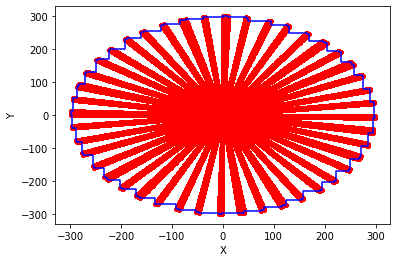

In [108]:

def main_parallel(input_points):
    startTime = datetime.now()
    o_points = find_orthogonal_convex_hull_parallel(input_points)
    endTime = datetime.now()
    timeInterval = endTime - startTime
    timeInSecond = timeInterval.total_seconds()
    print(f"Parallel pool algorithm running time: {timeInSecond} seconds.")


    show_graph(input_points, o_points)

if __name__ == '__main__':
    main_parallel(input_points)

## Thực thi song song dùng thread

Parallel pool algorithm running time: 7.540701 seconds.
show graph: 


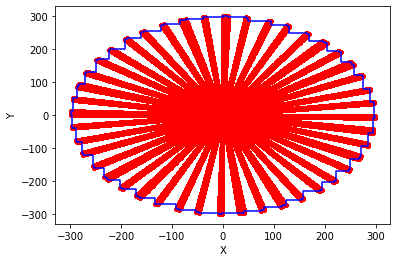

In [109]:
def main_parallel_using_thread(input_points):
    startTime = datetime.now()
    o_points = find_orthogonal_convex_hull_using_thread(input_points)

    # Time measurement ends here
    endTime = datetime.now()
    timeInterval = endTime - startTime
    timeInSecond = timeInterval.total_seconds()
    print(f"Parallel threaad algorithm running time: {timeInSecond} seconds.")

    show_graph(input_points, o_points)

if __name__ == '__main__':
    main_parallel(input_points)


## Thực thi song song dùng ray

2021-11-13 17:25:52,271	INFO worker.py:833 -- Calling ray.init() again after it has already been called.


Parallel threaad algorithm running time: 5.618157 seconds.
show graph: 


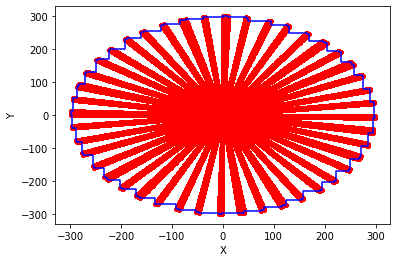

In [110]:
def main_parallel_using_ray(input_points):
    ray.init(ignore_reinit_error=True)
    startTime = datetime.now()
    o_points = find_orthogonal_convex_hull_using_ray(input_points)
     # Time measurement ends here
    endTime = datetime.now()
    timeInterval = endTime - startTime
    timeInSecond = timeInterval.total_seconds()
    print(f"Parallel threaad algorithm running time: {timeInSecond} seconds.")
    show_graph(input_points, o_points)


if __name__ == '__main__':
  main_parallel_using_ray(input_points)

## Thực Thi tuần tự

Sequential algorithm running time: 11.809507 seconds.
show graph: 


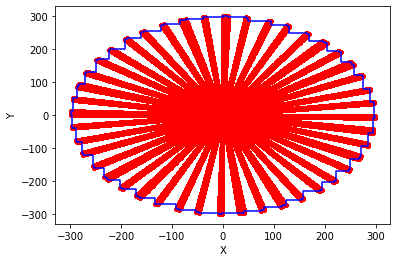

In [111]:

def main_sequential(input_points):
    startTime = datetime.now()
    o_points = findOrthogonalConvexHull(input_points)
    endTime = datetime.now()
    timeInterval = endTime - startTime
    timeInSecond = timeInterval.total_seconds()
    print(f"Sequential algorithm running time: {timeInSecond} seconds.")
    show_graph(input_points, o_points)

main_sequential(input_points)

# Kết luận
* Dưới đây là bản kết quả thời gian chạy của các thuật toán tuần tự với các dạng bao lồi và số lượng điểm khác nhau.

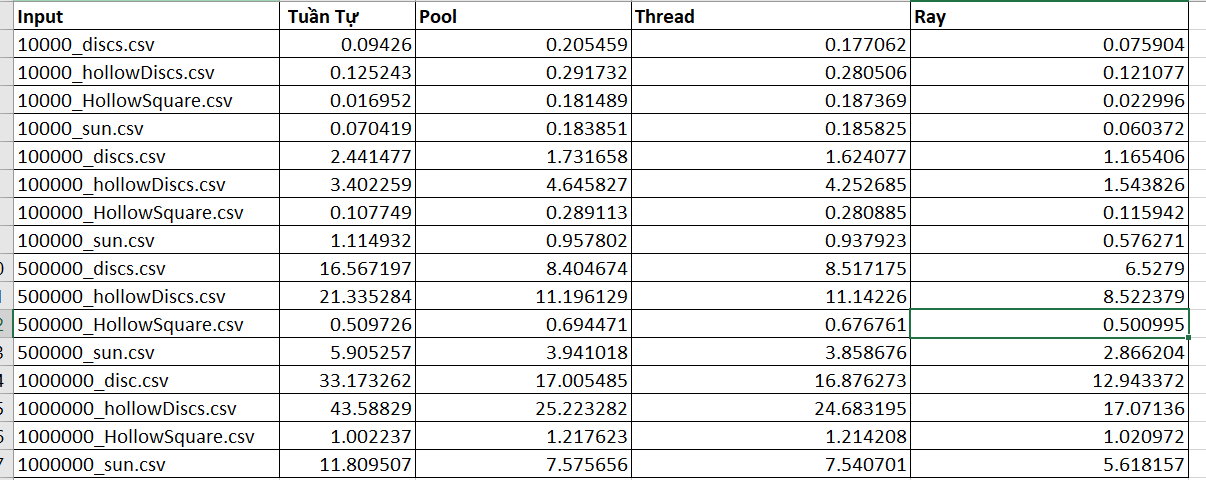

* Ta quan sát thấy thuật toán song song dùng pool và dùng thread gần như là tương đồng. 

* Đối với cái file dữ liệu nhỏ, thời gian cua thuật toán song song dùng pool và thread sẽ chậm hơn thuật toán tuần tự rất nhiều. Theo dự đoán, phần tốn thời gian là do việc khởi tạo pool, thread, khởi động và đóng pool, kill thread.
* Thư viện ray khá ấn tượng, dữ liện với input size = 10,000 tốc độ thực thi đã tương đương với song song
* Dữ liệu từ 100,000 thì với dạng đĩa, mặt trời, và các thuật toán song song dùng pool, thread có thời gian chạy nhanh so hơn với tuần tự. Các dạng bao lồi còn lại thì thuật toán dùng ray tương đương với thuật toán tuần tự
* Dữ liệu đến 500,000 thuật toán song song đã vượt trội thuất toán tuần từ rất nhiều, trừ bao lồi hollow squard. Qua đây ta có thể kết luận rằng, thuật toán bao lồi  tuần tự  dạng hollow squard chạy tốt.

* Dùng Thread

1.  Ưu điểm: dữ liệu input sẽ được chia sẽ đồng thời giữa các task.

2. Nhược điểm: Việc tạo quá nhiều thread và giết nó có thể gây tốn tà và chúng ta phải quản lý việc chia sẽ data giưa các thread, nên sẽ tốn thời gian cho việc lập trình

* Dùng Pool

  1.  Ưu điểm: với cách này thì ưu điểm là tính dependency khá cao, dữ liệu không phụ thuộc lẫn nhau, cách hiện thực khá dễ hiểu. và quản lý resouces tốt khi tránh spawning thread: Việc này có thể gây lãng phí tài nguyên.

  2. Nhược điểm: cách làm này có thể khả năng gây ra tình trạng unbalanced input data khi chia cho 4 worker, nên 1 worker có thể làm phần lớn công việc, và các worker khác ngồi chơi. Thứ 2 không tận dụng được tài nguyên tính toán của máy song song.

  3. Hướng mở rộng: có thể chia nhỏ hơn vùng data thay vì góc 1/4 như hiện tại để tạo nhiều workers hơn, đồn thời tăng tính đồng thời

* Dùng Ray

  1.  Ưu điểm: Sử dụng 1 thư viện distributed đồng thời hiện đại giúp ta tối ưu hóa tài nguyên khi ray được khởi tạo trước và có thể dùng lại resources để tính toán. Cách cài đặt khá đơn giản và dễ sử dụng. Có thể xây dựng 1 server riêng để tính toán, và xửa lý việc máy bị down tốt.

  2. Nhược điểm: giống như pool có thể dẫn đến unbalanced input data ở mỗi góc phần tư. Thứ 2 Ray là 1 distributed engine, nên sẽ có phí tổn trong việc communication với server

  3. Hướng mở rộng: giống pool